<a href="https://colab.research.google.com/github/PristRawal/Machine-Learning/blob/master/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle --quiet

In [ ]:
!pip install kaggle --quiet
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/MLProjects/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database --unzip


Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 32.0MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [ ]:
print(df.head())
print(df.describe())
print(df['Outcome'].value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [ ]:
# Plot pairplot
sns.pairplot(df, hue='Outcome')
plt.show()

In [ ]:
# Features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Baseline model - Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
models = {
    "Logistic": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [ ]:
print("\nCross-Validation Scores (F1 and Recall):")
for name, model in models.items():
    f1 = cross_val_score(model, X_scaled, y, scoring='f1', cv=5).mean()
    recall = cross_val_score(model, X_scaled, y, scoring='recall', cv=5).mean()
    print(f"{name} - F1: {f1:.2f}, Recall: {recall:.2f}")


Cross-Validation Scores (F1 and Recall):
Logistic - F1: 0.64, Recall: 0.57
RandomForest - F1: 0.64, Recall: 0.58
SVM - F1: 0.63, Recall: 0.56
KNN - F1: 0.59, Recall: 0.55
GradientBoosting - F1: 0.63, Recall: 0.60


In [ ]:
 #Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=5)
grid.fit(X_scaled, y)
print("\nBest RandomForest Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Best RandomForest Params: {'max_depth': 10, 'n_estimators': 100}
Best F1 Score: 0.6429384518827518


In [ ]:
# Final model training and evaluation
final_model = grid.best_estimator_
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))


Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



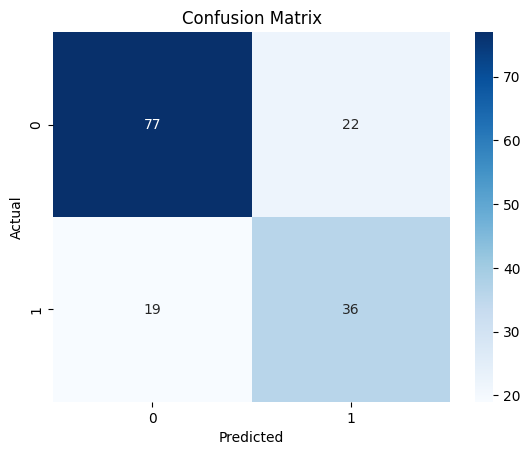

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

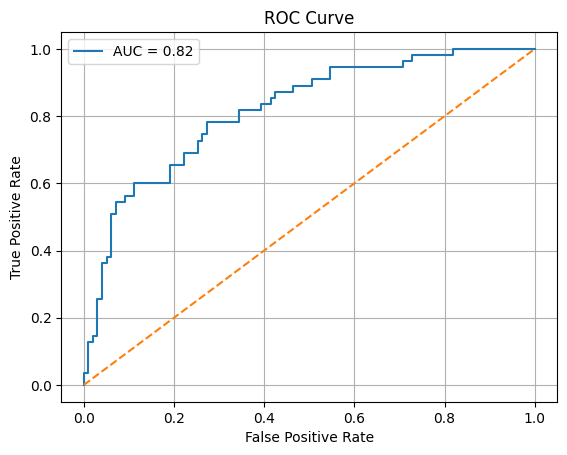

In [ ]:
# ROC Curve
y_proba = final_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save model and scaler
joblib.dump(final_model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved.")

Model and scaler saved.
